In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

## Гамильтониан: 
$H=-\frac{\omega_q}{2}\sigma_z+{\Omega}cos(wt)\sigma_y$

## Настройка параметров задачи:


In [2]:
wq = 1.0  * 2 * np.pi  # частота кубита
Omega = 0.1  * 2 * np.pi  # сила связи
wd=1.0  * 2 * np.pi # частота сигнала
phi=np.pi-0.5
tlist = np.linspace(0,30,3000)

## Задание начального состояния, гамильтониана, операторов:

In [3]:
#начальное состояние
psi0 = basis(2,0)
# гамильтониан
sx = sigmax()
sy = sigmay()
sz = sigmaz()
a  = destroy(2)

H0 = -(wq/2) * sz
H1 = Omega * sy
H = [H0, [H1, 'cos(wd*t)']]
H_args = {'wd': wd}

## Решение:

In [4]:
output = mesolve(H, psi0, tlist,{},[sx, sy, sz],H_args)

##  Визуализация:

Text(0, 0.5, '$\\sigma_z$')

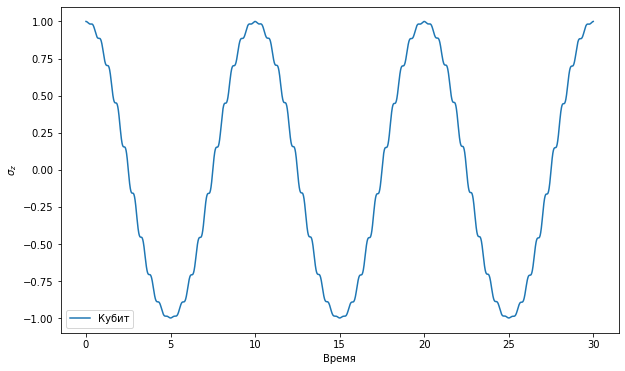

In [5]:
n_c = output.expect[2]

fig, axes = plt.subplots(1, 1, figsize=(10,6))

axes.plot(tlist, n_c, label="Кубит")

axes.legend(loc=0)
axes.set_xlabel('Время')
axes.set_ylabel('$\sigma_z$')

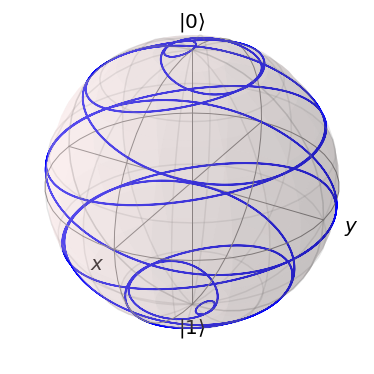

In [6]:
sphere=Bloch()
sphere.add_points([output.expect[0],output.expect[1],output.expect[2]], meth='l')
sphere.show()

## Гамильтониан в представлении взаимодействия(вращение с частотой драйва): 
$H=-\frac{\omega_q-\omega_d}{2}\sigma_z+{\Omega}(I sin(w_d t)-Q cos(w_d t))(cos(w_d t)\sigma_y-Q sin(w_d t))\sigma_y),$
где $\delta w= w_q-w_d$, $I= cos(\phi)$, $Q=sin(\phi)$

## Задание начального состояния, гамильтониана, операторов:

In [7]:
#начальное состояние
psi0 = basis(2,0)
# гамильтониан
sx = sigmax()
sy = sigmay()
sz = sigmaz()
I=np.cos(phi)
Q=np.sin(phi)

H0 = -((wq-wd)/2) * sz
delta_w = wq-wd
H1 = 1/2*Omega*sx
H2=1/2*Omega*sy
H = [H0,[H1,'-I*(1/2-1/2*cos(2*wd*t))+Q/2*sin(2*wd*t)'],[H2,'I*1/2*sin(2*wd*t)-Q*(1/2+1/2*cos(2*wd*t))']]
H_args = {'wd':wd, 'I':I,'Q':Q}

## Решение:

In [8]:
output = mesolve(H, psi0, tlist,{},[sx, sy, sz], H_args)

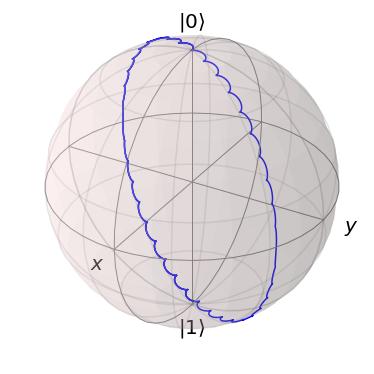

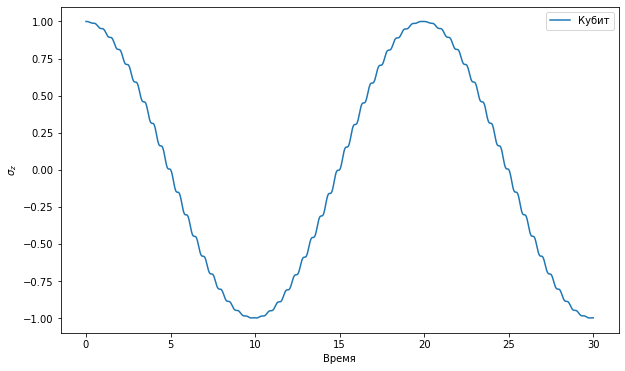

In [9]:
n_c = output.expect[2]

fig, axes = plt.subplots(1, 1, figsize=(10,6))

axes.plot(tlist, n_c, label="Кубит")

axes.legend(loc=0)
axes.set_xlabel('Время')
axes.set_ylabel('$\sigma_z$')

sphere=Bloch()
sphere.add_points([output.expect[0],output.expect[1],output.expect[2]], meth='l')
sphere.show()